In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import h5py
import plots

In [2]:
plt.subplots_adjust(left=0.08,
                    bottom=0.12, 
                    right=0.99, 
                    top=0.92, 
                    wspace=0.0,
                    hspace=0.25)

<Figure size 432x288 with 0 Axes>

1
5
1
5


/tmp/ipykernel_15621/322868979.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


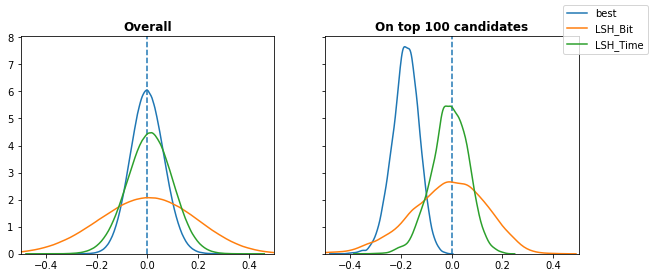

In [2]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize=(10,4))
best = h5py.File(plots.d_prefix[0] + "_" + "euclidean_8_no_perm.hdf5", "r")
best_eip = np.array(best["estimated_inner"])#[:,:50000]
best_tip  =np.array(best["true_inner"])#[:,:50000]
plots.TOP = False
for ax in axes:
    plots.plot_err(best_eip, best_tip, ax, "best")
    ax.axvline(0.0, linestyle="--")
    for i, lsh in enumerate(plots.lsh_types.keys()):
        data_path = plots.d_prefix[0] + "_" + lsh
        n_sketches = plots.lsh_types[lsh][1]
        print(n_sketches)
        hf = h5py.File(data_path, "r")
        estimates = plots.infer_estimates(np.array(hf["collisions"]), n_sketches)#[:,:5000]

        true = np.array(hf["true_inner"])#[:,:5000]
        plots.plot_err(estimates, true, ax, plots.lsh_types[lsh][0])
        hf.close()
        del estimates
        del true

    plots.TOP = True

handles, labels = axes[0].get_legend_handles_labels()
axes[0].set_title("Overall", fontweight="semibold")
axes[1].set_title("On top 100 candidates", fontweight="semibold")
axes[0].set_xlim(-0.5, 0.5)
axes[1].set_xlim(-0.5, 0.5)

#fig.text(0.02, 0.5 ,"Density", va="center", rotation="vertical", fontsize=15)
#fig.text(0.52, 0.02 ,"Estimation Error", ha="center", fontsize=15)

fig.legend(handles, labels)
fig.show()


In [3]:
fig.savefig("../../plots/lsh_comp.svg", format="svg")

In [7]:
int("1")

1

In [21]:
print(est[0] - est[1], est[30] - est[31]) 

-0.001204543794827595 -0.04894946600214265


In [2]:
def plot_lsh(fn, ax, n, lab):
    hf = h5py.File(fn, "r")
    col = np.array(hf["collisions"])
    est = plots.infer_estimates(col,n)
    est = est.reshape(-1)
    print(est.shape)
    true = np.array(hf["true_inner"]).reshape(-1)
    diffs = est - true 
    sample = np.random.choice(diffs, size = 500000, replace = False)
    sns.kdeplot(sample, label=lab, ax=ax)
    hf.close()


[-1.00000000e+00 -9.98795456e-01 -9.95184727e-01 -9.89176510e-01
 -9.80785280e-01 -9.70031253e-01 -9.56940336e-01 -9.41544065e-01
 -9.23879533e-01 -9.03989293e-01 -8.81921264e-01 -8.57728610e-01
 -8.31469612e-01 -8.03207531e-01 -7.73010453e-01 -7.40951125e-01
 -7.07106781e-01 -6.71558955e-01 -6.34393284e-01 -5.95699304e-01
 -5.55570233e-01 -5.14102744e-01 -4.71396737e-01 -4.27555093e-01
 -3.82683432e-01 -3.36889853e-01 -2.90284677e-01 -2.42980180e-01
 -1.95090322e-01 -1.46730474e-01 -9.80171403e-02 -4.90676743e-02
  6.12323400e-17  4.90676743e-02  9.80171403e-02  1.46730474e-01
  1.95090322e-01  2.42980180e-01  2.90284677e-01  3.36889853e-01
  3.82683432e-01  4.27555093e-01  4.71396737e-01  5.14102744e-01
  5.55570233e-01  5.95699304e-01  6.34393284e-01  6.71558955e-01
  7.07106781e-01  7.40951125e-01  7.73010453e-01  8.03207531e-01
  8.31469612e-01  8.57728610e-01  8.81921264e-01  9.03989293e-01
  9.23879533e-01  9.41544065e-01  9.56940336e-01  9.70031253e-01
  9.80785280e-01  9.89176

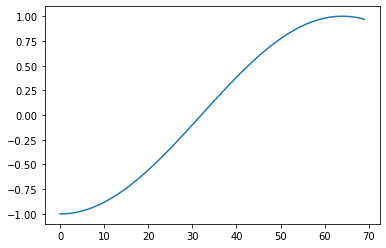

In [22]:
a = np.array([i for i in range(70)])
est = plots.infer_estimates(a, 1)
plt.plot(a, est)

(118351400,)
(118351400,)


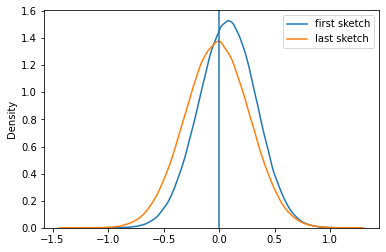

In [3]:
data_path_last = plots.d_prefix[0] + "_lsh_1_last.hdf5"
#data_path5 = plots.d_prefix[0] + "_lsh_5_old.hdf5"

data_path_first = plots.d_prefix[0] + "_lsh_1_first.hdf5"
#data_path5 = plots.d_prefix[0] + "_lsh_5.hdf5"
ax = plt.gca()
plot_lsh(data_path_first, ax, 1, "first sketch")
plot_lsh(data_path_last, ax, 1, "last sketch")
#plot_lsh(data_path_last, ax, 1)
#plot_lsh(data_path5, ax, 5)
#plot_lsh(data_path5_last, ax, 5)
ax.axvline(0.0)
plt.legend()
plt.show()

(118351400,)


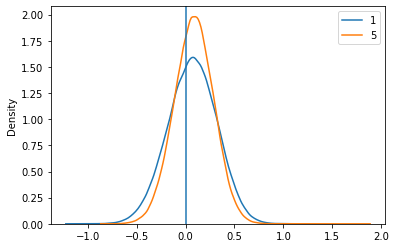

In [13]:
col = np.array(hf["collisions"])
col5 = np.array(hf5["collisions"])
cp = col/(64*1)
cp5 = col5/(64*5)
est = plots.infer_estimates(cp)
est5 = plots.infer_estimates(cp5)
est = est.reshape(-1)
est5 = est5.reshape(-1)
print(est.shape)
true = np.array(hf["true_inner"]).reshape(-1)
true5 = np.array(hf5["true_inner"]).reshape(-1)
diffs = est - true 
diffs5 = est5 - true5 
sample = np.random.choice(diffs, size = 200000, replace = False)
sample5 = np.random.choice(diffs5, size = 200000, replace = False)
sns.kdeplot(sample, label="1")
sns.kdeplot(sample5, label ="5")
plt.axvline(0.0)
plt.legend()


In [11]:
axes[0].set_xlim(-0.5, 0.5)
axes[1].set_xlim(-0.7, 0.3)

(-0.7, 0.3)

In [12]:
fig.show()

/tmp/ipykernel_25256/89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [13]:
fig.savefig("../../plots/LSH_comp.svg", format="svg")